# Problem Statement:
### To classify a given review into a positive or a negative review using sentiment analysis in Machine Learning


# Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
data = pd.read_csv("IMDB dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

## Description about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 390.7+ KB


In [5]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


# Statistical Analysis

In [6]:
data['sentiment'].describe()

count        50000
unique           2
top       positive
freq         25000
Name: sentiment, dtype: object

In [7]:
data.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

# Visualising the data

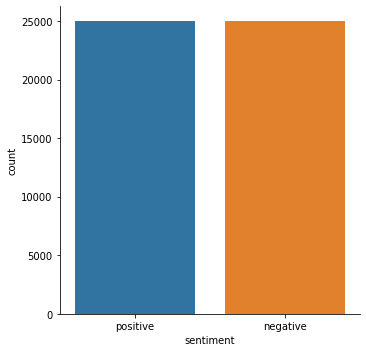

In [8]:
sns.catplot("sentiment",data=data,kind='count')

# Data Cleaning/ Data Pre-processing:

In [9]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [66]:
X=data.review
X.head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

In [68]:
y=data.sentiment
y.head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.review, data.sentiment, 
                                            test_size= 0.2, random_state=1 )

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000,)
(40000,)
(10000,)
(10000,)


In [12]:
##Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# creating an object for CountVectorizer
count_vect = CountVectorizer()

In [13]:
# Generate the word counts for the words in the documents
word_count_vector = count_vect.fit(X_train)

# To get the feature names
word_count_vector.get_feature_names()

['00',
 '000',
 '00000000000',
 '0000000000001',
 '00001',
 '00015',
 '000dm',
 '001',
 '003830',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0148',
 '01pm',
 '02',
 '020410',
 '0230',
 '03',
 '039',
 '04',
 '041',
 '044',
 '05',
 '050',
 '05nomactr',
 '06',
 '0615',
 '06th',
 '07',
 '07b',
 '08',
 '089',
 '08th',
 '09',
 '0and',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10_',
 '10am',
 '10ft',
 '10k',
 '10lines',
 '10mil',
 '10mins',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yo',
 '10yr',

In [14]:
#TFIDF VECTORIZER
from sklearn.feature_extraction.text import TfidfVectorizer
#initialize an object for the tfidf vectorizer
tfidf = TfidfVectorizer()

In [15]:
#apply the tfidf to the data(X_train)

X_train_transformed = tfidf.fit_transform(X_train)
X_train_transformed

<40000x93163 sparse matrix of type '<class 'numpy.float64'>'
	with 5471200 stored elements in Compressed Sparse Row format>

In [16]:
X_test_transformed = tfidf.transform(X_test)
X_test_transformed

<10000x93163 sparse matrix of type '<class 'numpy.float64'>'
	with 1345978 stored elements in Compressed Sparse Row format>

In [17]:
#Feature names
tfidf.get_feature_names()

['00',
 '000',
 '00000000000',
 '0000000000001',
 '00001',
 '00015',
 '000dm',
 '001',
 '003830',
 '0069',
 '007',
 '0079',
 '007s',
 '0080',
 '0083',
 '0093638',
 '00am',
 '00o',
 '00pm',
 '00s',
 '00schneider',
 '01',
 '0148',
 '01pm',
 '02',
 '020410',
 '0230',
 '03',
 '039',
 '04',
 '041',
 '044',
 '05',
 '050',
 '05nomactr',
 '06',
 '0615',
 '06th',
 '07',
 '07b',
 '08',
 '089',
 '08th',
 '09',
 '0and',
 '0f',
 '0r',
 '0s',
 '0tt',
 '10',
 '100',
 '1000',
 '10000',
 '1000000',
 '10000000000',
 '10000000000000',
 '10000th',
 '1000s',
 '1001',
 '1004',
 '100b',
 '100bt',
 '100ft',
 '100ibs',
 '100k',
 '100m',
 '100miles',
 '100min',
 '100mins',
 '100mph',
 '100s',
 '100th',
 '100times',
 '100x',
 '101',
 '101st',
 '102',
 '102nd',
 '103',
 '104',
 '1040',
 '1040a',
 '105',
 '1050',
 '106',
 '106min',
 '107',
 '108',
 '1080p',
 '109',
 '10_',
 '10am',
 '10ft',
 '10k',
 '10lines',
 '10mil',
 '10mins',
 '10minutes',
 '10p',
 '10pm',
 '10s',
 '10star',
 '10th',
 '10x',
 '10yo',
 '10yr',

In [18]:
# position of the words
tfidf.vocabulary_

{'this': 82770,
 'film': 30396,
 'has': 37275,
 'been': 8238,
 'compared': 17187,
 'to': 83469,
 'the': 82503,
 'hilarious': 38473,
 'british': 11525,
 'comedy': 16954,
 'fish': 30690,
 'called': 12851,
 'wanda': 89606,
 'although': 3626,
 'can': 13020,
 'see': 72931,
 'why': 90722,
 'only': 58689,
 'connection': 17782,
 'find': 30513,
 'is': 42841,
 'monty': 54568,
 'python': 65803,
 'one': 58660,
 'eric': 27675,
 'idle': 40350,
 'in': 40978,
 'nuns': 57814,
 'john': 43970,
 'cleese': 16085,
 'and': 4125,
 'michael': 53058,
 'palin': 60138,
 'otherwise': 59249,
 'two': 85524,
 'are': 5175,
 'incomparable': 41142,
 'br': 10973,
 'robbie': 69795,
 'coltrane': 16886,
 'gangsters': 33156,
 'who': 90657,
 'want': 89640,
 'get': 33887,
 'out': 59311,
 'of': 58320,
 'business': 12394,
 'before': 8286,
 'they': 82672,
 'end': 27031,
 'up': 87431,
 'dead': 20920,
 'so': 76375,
 'decide': 21128,
 'rip': 69576,
 'off': 58327,
 'their': 82536,
 'boss': 10742,
 'make': 50369,
 'for': 31527,
 'rio'

In [19]:
# Idf of the terms
tfidf.idf_

array([ 6.54041393,  5.70778177, 10.90351255, ..., 10.90351255,
       10.90351255, 10.90351255])

# Naive Bayes

In [20]:
# Apply the naive bayes algorithm
from sklearn.naive_bayes import BernoulliNB
#creating an object
model_BernNB = BernoulliNB()

In [21]:
# Applying the Algorithm to the data
# ObjectName.fit(Input, Output)

model_BernNB.fit(X_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [69]:
# Prediction on Train Data
# Syntax: objectname.predict(InputValues)
y_train_pred = model_BernNB.predict(X_train_transformed)

In [23]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score
confusion_matrix(y_train,y_train_pred)

array([[18376,  1580],
       [ 2494, 17550]], dtype=int64)

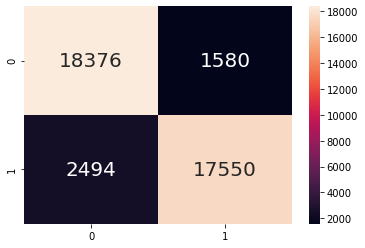

In [24]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [25]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

    negative       0.88      0.92      0.90     19956
    positive       0.92      0.88      0.90     20044

    accuracy                           0.90     40000
   macro avg       0.90      0.90      0.90     40000
weighted avg       0.90      0.90      0.90     40000



In [72]:
accuracy_score(y_train,y_train_pred)

0.89815

In [26]:
# prediction on test data
# syntax: objectname.predict(input)
y_test_pred = model_BernNB.predict(X_test_transformed)

In [27]:
# compare the actual values(y_test) with predicted values(y_test_pred)

confusion_matrix(y_test,y_test_pred)

array([[4431,  613],
       [ 780, 4176]], dtype=int64)

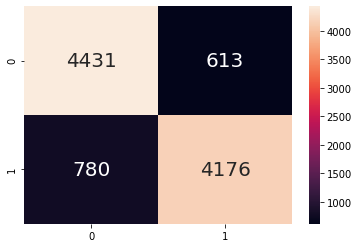

In [28]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [29]:
accuracy_score(y_test,y_test_pred)

0.8607

In [30]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    negative       0.85      0.88      0.86      5044
    positive       0.87      0.84      0.86      4956

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Logistic Regression

In [31]:
# build the classifier on training data
#sklearn library: import,instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_transformed,y_train)  #input and output will be passed to fit method

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#predicting on train data
# syntax : objectname.predict(Input)
y_train_pred =reg.predict(X_train_transformed)
y_train_pred

array(['negative', 'positive', 'positive', ..., 'negative', 'negative',
       'positive'], dtype=object)

In [33]:
# confusion matrix for the training data
# confusion matrix(actual values,predicted values)
from sklearn.metrics import confusion_matrix , accuracy_score
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[18422,  1534],
       [ 1239, 18805]], dtype=int64)

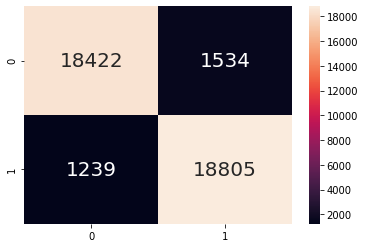

In [34]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.930675

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred)) 

              precision    recall  f1-score   support

    negative       0.94      0.92      0.93     19956
    positive       0.92      0.94      0.93     20044

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



In [37]:
#predicting on testing data
y_test_pred =reg.predict(X_test_transformed)
y_test_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [38]:
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[4482,  562],
       [ 454, 4502]], dtype=int64)

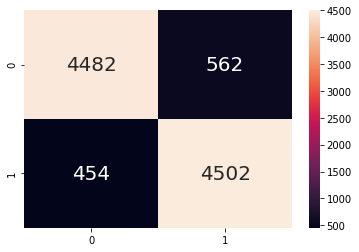

In [39]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [40]:
accuracy_score(y_test,y_test_pred)

0.8984

In [41]:
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5044
    positive       0.89      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Random Forest Classification

In [42]:
#Import, intialize and fit

#Import the RfC from sklearn
from sklearn.ensemble import RandomForestClassifier


#Initilaize the object for RFC
rfc = RandomForestClassifier(n_estimators = 40)

#fit the TFC to the dataset
rfc.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
#Prediction on training data
#Syntax: ojectname.predict(InputValues)
y_train_pred = rfc.predict(X_train_transformed)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     19956
    positive       1.00      1.00      1.00     20044

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



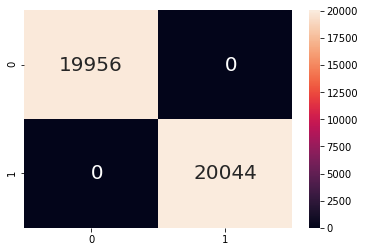

In [44]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [45]:
accuracy_score(y_train,y_train_pred)

1.0

In [46]:
#Prediction on testing data
y_test_pred =rfc.predict(X_test_transformed)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82      5044
    positive       0.83      0.80      0.81      4956

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



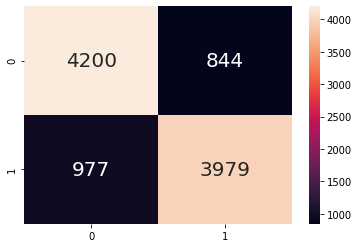

In [47]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [48]:
accuracy_score(y_test,y_test_pred)

0.8179

# Hyper parameter tuning of Logistic Regression

In [49]:
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'intercept_scaling' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept' : ['True','False']
    
}

In [50]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = LogisticRegression()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param)

# applying gridsearch onto dataset
grid_search.fit(X_train_transformed, y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': ['True', 'False'],
                         'intercept_scaling': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='

In [51]:
# return the optimal parameters
grid_search.best_params_

{'C': 10, 'fit_intercept': 'True', 'intercept_scaling': 0.01, 'penalty': 'l2'}

In [52]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = LogisticRegression(C=10, fit_intercept=True, intercept_scaling=0.01, penalty='l2')

# We need to fit the model to the data
clf.fit(X_train_transformed, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=0.01, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#predicting on testing data
y_test_pred =clf.predict(X_test_transformed)
y_test_pred

array(['negative', 'negative', 'negative', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [54]:
conf = confusion_matrix(y_test,y_test_pred)
conf

array([[4522,  522],
       [ 446, 4510]], dtype=int64)

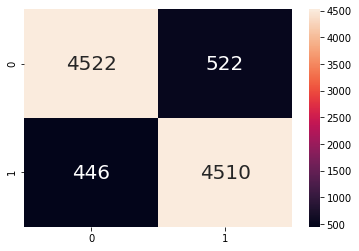

In [55]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [56]:
accuracy_score(y_test,y_test_pred)

0.9032

In [57]:
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      5044
    positive       0.90      0.91      0.90      4956

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Roc Auc Curve

In [58]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [59]:
model_BernNB = BernoulliNB()
clf = LogisticRegression(C=10, fit_intercept=True, intercept_scaling=0.01, penalty='l2')
rfc = RandomForestClassifier(n_estimators = 40)


In [60]:
model_BernNB.fit(X_train_transformed,y_train)
clf.fit(X_train_transformed,y_train)
rfc.fit(X_train_transformed,y_train)

C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
pred_prob1=model_BernNB.predict_proba(X_test_transformed)
pred_prob2=clf.predict_proba(X_test_transformed)
pred_prob3=rfc.predict_proba(X_test_transformed)

In [62]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1,tpr1,thresh1 = roc_curve(y_test_pred,pred_prob1[:,1],pos_label='positive')
fpr2,tpr2,thresh2 = roc_curve(y_test_pred,pred_prob2[:,1],pos_label='positive')
fpr3,tpr3,thresh3 = roc_curve(y_test_pred,pred_prob3[:,1],pos_label='positive')

In [63]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test_pred,pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_pred,pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test_pred,pred_prob3[:,1])

print(auc_score1,auc_score2,auc_score3)

0.9505193332718909 1.0 0.9271553562833933


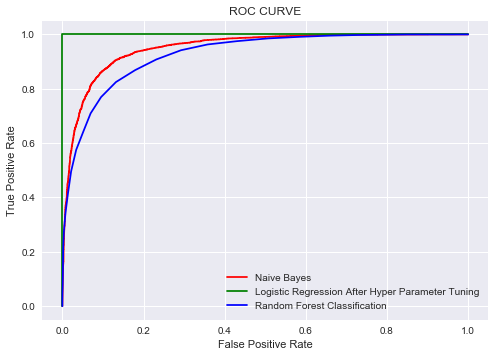

In [64]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#plot roc curves
plt.plot(fpr1,tpr1,linestyle='-',color='red',label='Naive Bayes')
plt.plot(fpr2,tpr2,linestyle='-',color='green',label='Logistic Regression After Hyper Parameter Tuning')
plt.plot(fpr3,tpr3,linestyle='-',color='blue',label='Random Forest Classification')


#title
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()